In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
bank = pd.read_excel("full_working_merged.xlsx")

In [27]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,year,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [28]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'year', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor_3m', 'nr_employed', 'y'],
      dtype='object')

In [29]:
index_2008 = {"may":{"emp_var_rate":1.1, "cons_price_idx":93.994, "cons_conf_idx":-36.4, "euribor_3m":4.85, "nr_employed":5191},
             "jun":{"emp_var_rate":1.4, "cons_price_idx":94.465, "cons_conf_idx":-41.8, "euribor_3m":4.86, "nr_employed":5228.1},
             "jul":{"emp_var_rate":1.4, "cons_price_idx":93.918, "cons_conf_idx":-42.7, "euribor_3m":4.96, "nr_employed":5228.1},
             "aug":{"emp_var_rate":1.4, "cons_price_idx":93.444, "cons_conf_idx":-36.1, "euribor_3m":4.965, "nr_employed":5228.1},
             "oct":{"emp_var_rate":-0.1, "cons_price_idx":93.798, "cons_conf_idx":-40.4, "euribor_3m":5, "nr_employed":5195.8},
             "nov":{"emp_var_rate":-0.1, "cons_price_idx":93.2, "cons_conf_idx":-42, "euribor_3m":4.406, "nr_employed":5195.8},
             "dec":{"emp_var_rate":-0.2, "cons_price_idx":92.75, "cons_conf_idx":-45.9, "euribor_3m":3.563, "nr_employed":5176.3}}

In [30]:
index_2009 = {"mar":{"emp_var_rate":-1.8, "cons_price_idx":92.84, "cons_conf_idx":-50, "euribor_3m":1.811, "nr_employed":5099.1},
              "apr":{"emp_var_rate":-1.8, "cons_price_idx":93.075, "cons_conf_idx":-47.1, "euribor_3m":1.498, "nr_employed":5099.1},
              "may":{"emp_var_rate":-1.8, "cons_price_idx":92.89, "cons_conf_idx":-46.2, "euribor_3m":1.334, "nr_employed":5099.1},
             "jun":{"emp_var_rate":-2.9, "cons_price_idx":92.963, "cons_conf_idx":-40.8, "euribor_3m":1.26, "nr_employed":5076.2},
             "jul":{"emp_var_rate":-2.9, "cons_price_idx":93.469, "cons_conf_idx":-33.6, "euribor_3m":1.072, "nr_employed":5076.2},
             "aug":{"emp_var_rate":-2.9, "cons_price_idx":92.201, "cons_conf_idx":-31.4, "euribor_3m":0.884, "nr_employed":5076.2},
             "sep":{"emp_var_rate":-3.4, "cons_price_idx":92.379, "cons_conf_idx":-29.8, "euribor_3m":0.813, "nr_employed":5017.5},
             "oct":{"emp_var_rate":-3.4, "cons_price_idx":92.431, "cons_conf_idx":-26.9, "euribor_3m":0.754, "nr_employed":5017.5},
             "nov":{"emp_var_rate":-3.4, "cons_price_idx":92.649, "cons_conf_idx":-30.1, "euribor_3m":0.722, "nr_employed":5017.5},
             "dec":{"emp_var_rate":-3, "cons_price_idx":92.713, "cons_conf_idx":-33, "euribor_3m":0.718, "nr_employed":5023.5}}

In [31]:
index_2010 = {"mar":{"emp_var_rate":--1.8, "cons_price_idx":92.369, "cons_conf_idx":-34.8, "euribor_3m":0.655, "nr_employed":5008.7},
              "apr":{"emp_var_rate":-1.8, "cons_price_idx":93.749, "cons_conf_idx":-34.6, "euribor_3m":0.64, "nr_employed":5008.7},
              "may":{"emp_var_rate":-1.8, "cons_price_idx":93.876, "cons_conf_idx":-40, "euribor_3m":0.668, "nr_employed":5008.7},
             "jun":{"emp_var_rate":-1.7, "cons_price_idx":94.055, "cons_conf_idx":-39.8, "euribor_3m":0.704, "nr_employed":4991.6},
             "jul":{"emp_var_rate":-1.7, "cons_price_idx":94.215, "cons_conf_idx":-40.3, "euribor_3m":0.79, "nr_employed":4991.6},
             "aug":{"emp_var_rate":-1.7, "cons_price_idx":94.027, "cons_conf_idx":-38.3, "euribor_3m":0.898, "nr_employed":4991.6},
             "sep":{"emp_var_rate":-1.1, "cons_price_idx":94.199, "cons_conf_idx":-37.5, "euribor_3m":0.886, "nr_employed":4963.6},
             "oct":{"emp_var_rate":-1.1, "cons_price_idx":94.601, "cons_conf_idx":-49.5, "euribor_3m":0.959, "nr_employed":4963.6},
             "nov":{"emp_var_rate":-1.1, "cons_price_idx":94.767, "cons_conf_idx":-50.8, "euribor_3m":1.05, "nr_employed":4963.6}}
             

In [32]:
for months, indexes in index_2008.items():
    for index, index_val in indexes.items():
        bank.loc[(bank['year'] == 2008) & (bank['month'] == months), index] = index_val

In [33]:
for months, indexes in index_2009.items():
    for index, index_val in indexes.items():
        bank.loc[(bank['year'] == 2009) & (bank['month'] == months), index] = index_val

In [34]:
for months, indexes in index_2010.items():
    for index, index_val in indexes.items():
        bank.loc[(bank['year'] == 2010) & (bank['month'] == months), index] = index_val

In [35]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,year,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.85,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.85,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.85,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.85,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.85,5191.0,no


In [36]:
bank.to_csv('bank_data.csv')

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import seaborn as sns

In [3]:
spark = SparkSession.builder.master('local[4]').appName('ml').getOrCreate()

In [4]:
data = spark.read.csv('bank_data.csv',header=True,inferSchema=True)

In [5]:
data.count()

86399

In [6]:
pdf=data.toPandas()

In [7]:
pd.pandas.set_option('display.max_columns',None)

In [8]:
pdf.head(5)

,_c0,age,job,marital,education,default,housing,loan,contact,month,year,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,2008,261,1,-1,0,nonexistent,1.1,93.994,-36.4,4.85,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,2008,149,1,-1,0,nonexistent,1.1,93.994,-36.4,4.85,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,2008,226,1,-1,0,nonexistent,1.1,93.994,-36.4,4.85,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,2008,151,1,-1,0,nonexistent,1.1,93.994,-36.4,4.85,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,2008,307,1,-1,0,nonexistent,1.1,93.994,-36.4,4.85,5191.0,no


In [9]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86399 entries, 0 to 86398
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _c0             86399 non-null  int32  
 1   age             86399 non-null  int32  
 2   job             86399 non-null  object 
 3   marital         86399 non-null  object 
 4   education       86399 non-null  object 
 5   default         86399 non-null  object 
 6   housing         86399 non-null  object 
 7   loan            86399 non-null  object 
 8   contact         86399 non-null  object 
 9   month           86399 non-null  object 
 10  year            86399 non-null  int32  
 11  duration        86399 non-null  int32  
 12  campaign        86399 non-null  int32  
 13  pdays           86399 non-null  int32  
 14  previous        86399 non-null  int32  
 15  poutcome        86399 non-null  object 
 16  emp_var_rate    82347 non-null  float64
 17  cons_price_idx  82347 non-null 

In [10]:
pdf.columns

Index(['_c0', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'year', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor_3m', 'nr_employed', 'y'],
      dtype='object')

In [11]:
#to drop the id of dataframe
new_data = pdf.filter(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'year', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor_3m', 'nr_employed', 'y'], axis=1)

In [12]:
new_data.head()

,age,job,marital,education,default,housing,loan,contact,month,year,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,2008,261,1,-1,0,nonexistent,1.1,93.994,-36.4,4.85,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,2008,149,1,-1,0,nonexistent,1.1,93.994,-36.4,4.85,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,2008,226,1,-1,0,nonexistent,1.1,93.994,-36.4,4.85,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,2008,151,1,-1,0,nonexistent,1.1,93.994,-36.4,4.85,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,2008,307,1,-1,0,nonexistent,1.1,93.994,-36.4,4.85,5191.0,no


In [13]:
new_data.describe()

,age,year,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed
count,86399.000000,86399.000000,86399.000000,86399.000000,86399.000000,86399.000000,82347.000000,82347.000000,82347.000000,82347.000000,82347.000000
mean,40.501372,2008.412713,258.221206,2.670286,20.681061,0.386127,0.105337,93.575532,-40.483621,3.652667,5167.113817
std,10.534861,0.592177,258.362746,2.947825,75.269141,1.713060,1.567119,0.581402,4.625350,1.719252,72.057759
min,17.000000,2008.000000,0.000000,1.000000,-1.000000,0.000000,-3.400000,92.201000,-50.800000,0.640000,4963.600000
25%,32.000000,2008.000000,103.000000,1.000000,-1.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,39.000000,2008.000000,180.000000,2.000000,-1.000000,0.000000,1.100000,93.749000,-41.800000,4.850000,5191.000000
75%,48.000000,2009.000000,319.000000,3.000000,-1.000000,0.000000,1.400000,93.994000,-36.400000,4.960000,5228.100000
max,98.000000,2010.000000,4918.000000,63.000000,871.000000,275.000000,1.800000,94.767000,-26.900000,5.000000,5228.100000


# Unique Categorical Value Counts

In [14]:
categories = new_data.filter(["job","marital","education","default","housing","loan","contact","month","year","poutcome","y"])
continuous = new_data.filter(["age","duration","campaign","pdays","previus","emp_var_rate","cons_conf_idx","euribor_3m","nr_employed"])

In [15]:
for columns in categories:
    print("Column Name", columns)
    print("-----------------------")
    print(categories[columns].value_counts())
    print("     ")
    print("******************************************************")
    print("     ")

Column Name job
-----------------------
blue-collar      18986
admin.           15593
technician       14340
management       12382
services          8123
retired           3984
self-employed     3000
entrepreneur      2943
unemployed        2317
housemaid         2300
student           1813
unknown            618
Name: job, dtype: int64
     
******************************************************
     
Column Name marital
-----------------------
married     52142
single      24358
divorced     9819
unknown        80
Name: marital, dtype: int64
     
******************************************************
     
Column Name education
-----------------------
secondary              23202
tertiary               13301
university.degree      12168
high.school             9515
primary                 6851
basic.9y                6045
professional.course     5243
basic.4y                4176
unknown                 3588
basic.6y                2292
illiterate                18
Name: education, 

In [16]:
new_data.loc[(new_data['job'] == "admin."), "job"] = "admin"
new_data["job"].unique()

array(['housemaid', 'services', 'admin', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [17]:
new_data = new_data.replace(["unknown","nonexistent"], np.nan)

In [18]:
new_data.head()

,age,job,marital,education,default,housing,loan,contact,month,year,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,2008,261,1,-1,0,NaN,1.1,93.994,-36.4,4.85,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,2008,149,1,-1,0,NaN,1.1,93.994,-36.4,4.85,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,2008,226,1,-1,0,NaN,1.1,93.994,-36.4,4.85,5191.0,no
3,40,admin,married,basic.6y,no,no,no,telephone,may,2008,151,1,-1,0,NaN,1.1,93.994,-36.4,4.85,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,2008,307,1,-1,0,NaN,1.1,93.994,-36.4,4.85,5191.0,no


In [19]:
new_data.isnull().sum()

age                   0
job                 618
marital              80
education          3588
default            8597
housing             990
loan                990
contact           13020
month                 0
year                  0
duration              0
campaign              0
pdays                 0
previous              0
poutcome          72522
emp_var_rate       4052
cons_price_idx     4052
cons_conf_idx      4052
euribor_3m         4052
nr_employed        4052
y                     0
dtype: int64

In [20]:
for columns in categories:
    new_data[columns] = new_data[columns].fillna(new_data[columns].mode()[0])
# Replacing null values of categorical columns with the mode

In [21]:
for cols in continuous:
    new_data[cols] = new_data[cols].fillna(new_data[cols].mean())
# Replacing null values of Continuous columns with the mean


In [22]:
new_data.isnull().sum()

age                  0
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
year                 0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx    4052
cons_conf_idx        0
euribor_3m           0
nr_employed          0
y                    0
dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_14480\3408110917.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = new_data.corr()


<Axes: >

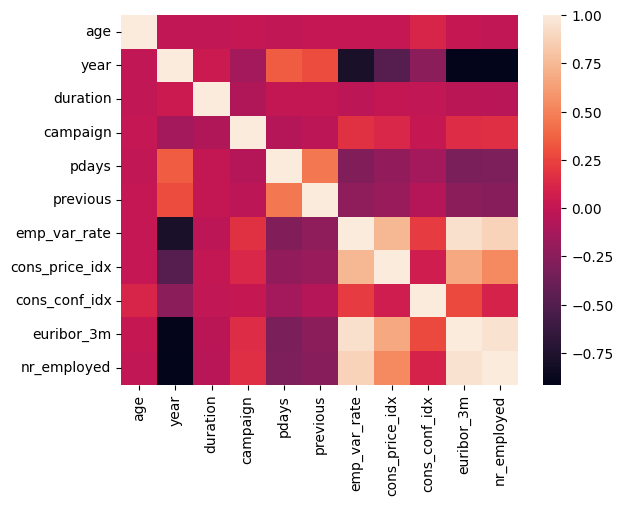

In [23]:
correlation = new_data.corr()
sns.heatmap(correlation)

### Data Visualization

### Hypothesis testing
    1. chivsq
    2. anova

In [24]:
# Creating a dictionary for converting categorical textual data entries
# into categorical numeric on basis of job profile
job_dict = {"entrepreneur":11, "self-employed":10, "admin":9, "management":8, "services":7, 
       "technician":6, "blue-collar":5, "housemaid":4, "retired":3, "student":2, "unemployed":1}

In [25]:
new_data["jobs"] = new_data["job"].map(job_dict)
new_data = new_data.drop("job", axis=1)

In [26]:
new_data.head()

,age,marital,education,default,housing,loan,contact,month,year,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y,jobs
0,56,married,basic.4y,no,no,no,telephone,may,2008,261,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,4
1,57,married,high.school,no,no,no,telephone,may,2008,149,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,7
2,37,married,high.school,no,yes,no,telephone,may,2008,226,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,7
3,40,married,basic.6y,no,no,no,telephone,may,2008,151,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,9
4,56,married,high.school,no,no,yes,telephone,may,2008,307,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,7


In [27]:
marital_dict = {"married":3, "single":2, "divorced":1}
new_data["maritals"] = new_data["marital"].map(marital_dict)
new_data = new_data.drop("marital", axis=1)
new_data.head()

,age,education,default,housing,loan,contact,month,year,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y,jobs,maritals
0,56,basic.4y,no,no,no,telephone,may,2008,261,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,4,3
1,57,high.school,no,no,no,telephone,may,2008,149,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,7,3
2,37,high.school,no,yes,no,telephone,may,2008,226,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,7,3
3,40,basic.6y,no,no,no,telephone,may,2008,151,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,9,3
4,56,high.school,no,no,yes,telephone,may,2008,307,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,7,3


In [28]:
old_edu = ["basic.4y", "high.school", "basic.6y", "basic.9y", "university.degree", "professional.course"]
new_edu = ["basic_4y", "high_school", "basic_6y", "basic_9y", "university_degree" ,"professional_course"]

for i in range(0,6):
    new_data.loc[(new_data['education'] == old_edu[i]), "education"] = new_edu[i]

In [29]:
new_data.head()

,age,education,default,housing,loan,contact,month,year,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y,jobs,maritals
0,56,basic_4y,no,no,no,telephone,may,2008,261,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,4,3
1,57,high_school,no,no,no,telephone,may,2008,149,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,7,3
2,37,high_school,no,yes,no,telephone,may,2008,226,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,7,3
3,40,basic_6y,no,no,no,telephone,may,2008,151,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,9,3
4,56,high_school,no,no,yes,telephone,may,2008,307,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,7,3


In [30]:
edu_dict = {"professional_course":10, "university_degree":9, "tertiary":8, "secondary":7, 
       "high_school":6, "basic_9y":5, "basic_6y":4, "primary":3, "basic_4y":2, "illiterate":1}
new_data["education"] = new_data["education"].map(edu_dict)
#new_data = new_data.drop("marital", axis=1)
new_data.head()

,age,education,default,housing,loan,contact,month,year,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y,jobs,maritals
0,56,2,no,no,no,telephone,may,2008,261,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,4,3
1,57,6,no,no,no,telephone,may,2008,149,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,7,3
2,37,6,no,yes,no,telephone,may,2008,226,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,7,3
3,40,4,no,no,no,telephone,may,2008,151,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,9,3
4,56,6,no,no,yes,telephone,may,2008,307,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,7,3


In [31]:
quarters = ["Q1", "Q2", "Q3", "Q4"]
months = [["jan","feb","mar"],["apr","may","jun"],["jul","aug","sep"],["oct","nov","dec"]]

for i in range(0,4):
    new_data["month"] = new_data["month"].replace(months[i], quarters[i])

In [32]:
new_data["month"].unique()

array(['Q2', 'Q3', 'Q4', 'Q1'], dtype=object)

In [33]:
new_data.head()

,age,education,default,housing,loan,contact,month,year,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y,jobs,maritals
0,56,2,no,no,no,telephone,Q2,2008,261,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,4,3
1,57,6,no,no,no,telephone,Q2,2008,149,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,7,3
2,37,6,no,yes,no,telephone,Q2,2008,226,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,7,3
3,40,4,no,no,no,telephone,Q2,2008,151,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,9,3
4,56,6,no,no,yes,telephone,Q2,2008,307,1,-1,0,failure,1.1,93.994,-36.4,4.85,5191.0,no,7,3


In [34]:
new_data = new_data.replace("yes", 1)
new_data = new_data.replace("no", 0)

In [35]:
new_data = pd.get_dummies(data = new_data, drop_first = True)
new_data.head(5)

,age,education,default,housing,loan,year,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y,jobs,maritals,contact_telephone,month_Q2,month_Q3,month_Q4,poutcome_other,poutcome_success
0,56,2,0,0,0,2008,261,1,-1,0,1.1,93.994,-36.4,4.85,5191.0,0,4,3,1,1,0,0,0,0
1,57,6,0,0,0,2008,149,1,-1,0,1.1,93.994,-36.4,4.85,5191.0,0,7,3,1,1,0,0,0,0
2,37,6,0,1,0,2008,226,1,-1,0,1.1,93.994,-36.4,4.85,5191.0,0,7,3,1,1,0,0,0,0
3,40,4,0,0,0,2008,151,1,-1,0,1.1,93.994,-36.4,4.85,5191.0,0,9,3,1,1,0,0,0,0
4,56,6,0,0,1,2008,307,1,-1,0,1.1,93.994,-36.4,4.85,5191.0,0,7,3,1,1,0,0,0,0


In [39]:
outliers_columns = ["age","duration","campaign","pdays","previous"]

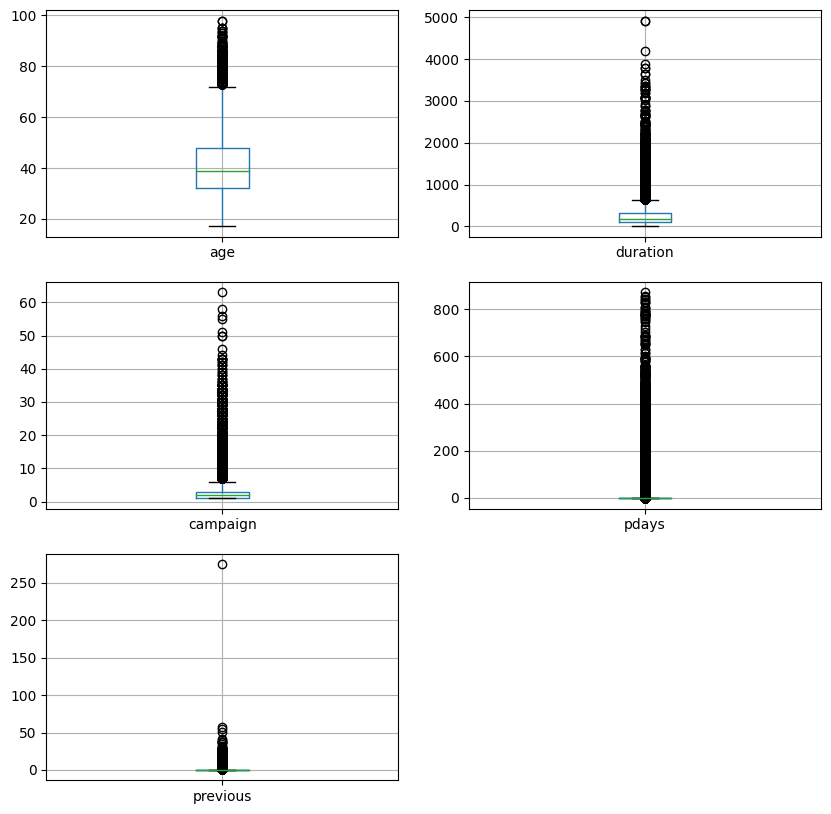

In [40]:
def plot_box():
    plt.figure(figsize=(10,10))
    plt.subplot(3,2,1)
    new_data.boxplot(column=["age"])

    plt.subplot(3,2,2)
    new_data.boxplot(column=["duration"])

    plt.subplot(3,2,3)
    new_data.boxplot(column=["campaign"])

    plt.subplot(3,2,4)
    new_data.boxplot(column=["pdays"])

    plt.subplot(3,2,5)
    new_data.boxplot(column=["previous"])
           
plot_box()

In [41]:
max_out_limit = []
for cols in outliers_columns:
    q3 = new_data[cols].quantile(0.75)
    q1 = new_data[cols].quantile(0.25)
    iqr = q3 - q1
    iqr = iqr*1.5
    max_limit = q3 + iqr
    min_limit = q1 - iqr
    max_out_limit.append(max_limit)
    print(cols, "max_limit: ",max_limit," min_limit: ",min_limit)
else:
    print("------------------------------------------")
    print(max_out_limit)

age max_limit:  72.0  min_limit:  8.0
duration max_limit:  643.0  min_limit:  -221.0
campaign max_limit:  6.0  min_limit:  -2.0
pdays max_limit:  -1.0  min_limit:  -1.0
previous max_limit:  0.0  min_limit:  0.0
------------------------------------------
[72.0, 643.0, 6.0, -1.0, 0.0]


In [42]:
for i, j in zip(outliers_columns, max_out_limit):
    new_data.loc[new_data[i]>=j, i]=j

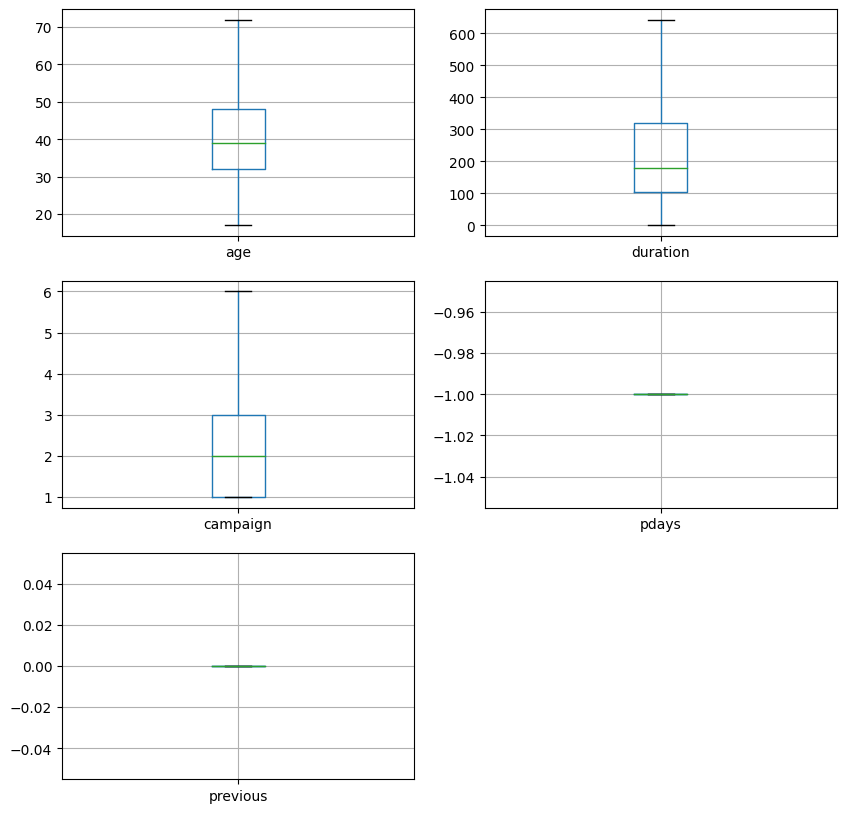

In [43]:
plot_box()

Next tasks:

finding the outliers

Visual Insights

Scaling if needed

feeding of data to the algorithm

Model Evaluation

Selecting proper Algorithm